In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.feature_selection import VarianceThreshold

# Load data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [220]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
#concat the both datasets so I get the same featrues for the test set
dataset = pd.concat([train,test])
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


# Exploratory Data Analysis

<h3>Missing Values</h3>

In [4]:
#check which numerical features that have nan values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_values = dataset.select_dtypes(include=numerics)
numerical_values.isnull().sum()

Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [5]:
dataset.fillna(dataset.mean(), inplace=True)

In [6]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

In [7]:
#select all category features and check which of them has nan values
categorical_values = dataset.select_dtypes(include=object)
categorical_values.isnull().sum() / len(dataset)

MSZoning         0.001370
Street           0.000000
Alley            0.932169
LotShape         0.000000
LandContour      0.000000
Utilities        0.000685
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000343
Exterior2nd      0.000343
MasVnrType       0.008222
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.027749
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtFinType1     0.027064
BsmtFinType2     0.027407
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000343
KitchenQual      0.000343
Functional       0.000685
FireplaceQu      0.486468
GarageType       0.053786
GarageFinish     0.054471
GarageQual       0.054471
GarageCond       0.054471
PavedDrive       0.000000
PoolQC      

<b><i>I choose to drop all features with 80% missing values</i></b>

In [8]:
#drop all columns aht have more than 80% missing values
dataset.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley'], axis=1, inplace=True)
#update teh categorical_values variable after removing some features
categorical_values = dataset.select_dtypes(include=object)

**I want to drop all rows with NA values but the FireplaceQu have 50% of it's rows to NA. So I choose to drop this column as well**

In [9]:
#drop all columns aht have more than 80% missing values
dataset.drop(['FireplaceQu'], axis=1, inplace=True)
#update teh categorical_values variable after removing some features
categorical_values = dataset.select_dtypes(include=object)

# Catergorical variables

In [10]:
categorical_values = dataset.select_dtypes(include=object)
categorical_values

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


In [11]:
#create a function to find all features that have more than 5 unique values
def over_5_unique(dataset):
        
    features = []

    for x in range(len(dataset.columns)):
        if dataset[dataset.columns[x]].nunique() > 5:
            features.append(dataset.columns[x])
            
    return features

In [12]:
categorical_features_to_remove = over_5_unique(categorical_values)

In [13]:
categorical_features_to_remove

['Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'Functional',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [14]:
#I remove all categorical features that have more than 5 unique values
dataset.drop(categorical_features_to_remove, axis=1, inplace=True)

In [15]:
categorical_values = dataset.select_dtypes(include=object)
categorical_values.isnull().sum()

MSZoning          4
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
BldgType          0
MasVnrType       24
ExterQual         0
ExterCond         0
BsmtQual         81
BsmtCond         82
BsmtExposure     82
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       1
GarageFinish    159
GarageQual      159
GarageCond      159
PavedDrive        0
dtype: int64

In [16]:
dataset = dataset.fillna(dataset.mode().iloc[0])

In [17]:
#create function to loop throug categorical features and add dummy values
def dummy_df(df, todummylist):
    for x in todummylist:
       dummies = pd.get_dummies(df[x], prefix=x, dummy_na = False)
       df = df.drop(x, 1)
       df = pd.concat([df, dummies], axis = 1)
    return df

In [18]:
#create a new dataset where the categorical variables are transformed to numerical features
dummies = list(categorical_values)
dataset_cat = dummy_df(dataset, dummies)

<h3><b>Try to find correlations between the features with different plots</b></h3>

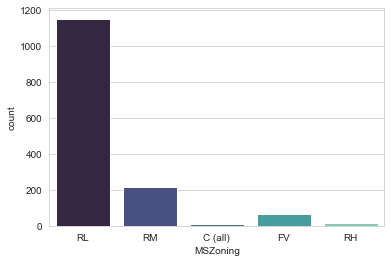

In [19]:
sns.countplot(data = train, x='MSZoning', palette='mako')

In [20]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

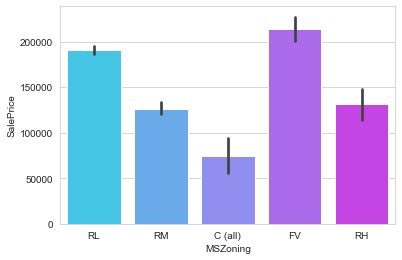

In [21]:
sns.barplot(data = train , x='MSZoning', y='SalePrice', palette='cool')

In [22]:
train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

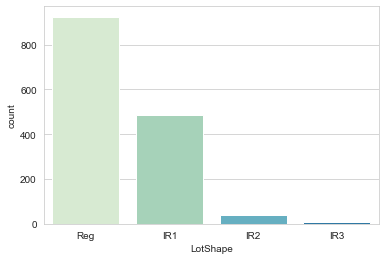

In [23]:
sns.countplot(data = train , x='LotShape', palette='GnBu')

In [24]:
train['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

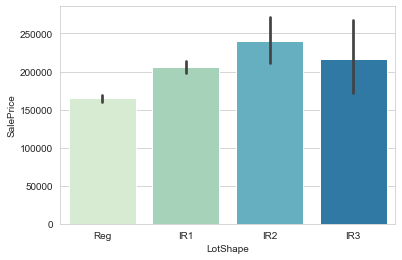

In [25]:
sns.barplot(data = train , x='LotShape', y='SalePrice', palette='GnBu')

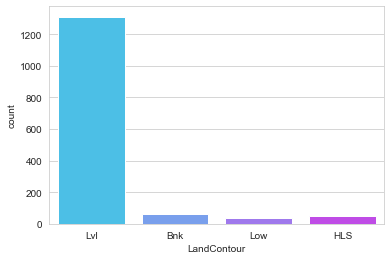

In [26]:
sns.countplot(data = train , x='LandContour', palette='cool')

In [27]:
train['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

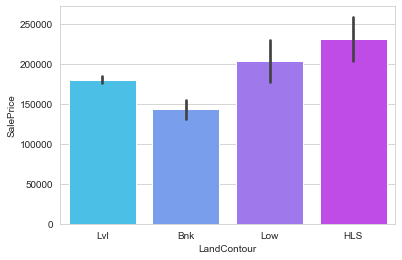

In [28]:
sns.barplot(data = train , x='LandContour', y='SalePrice', palette='cool')

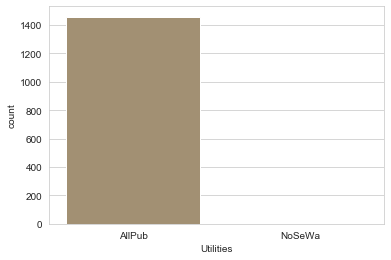

In [29]:
sns.countplot(data = train , x='Utilities', palette='terrain_r')

In [30]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

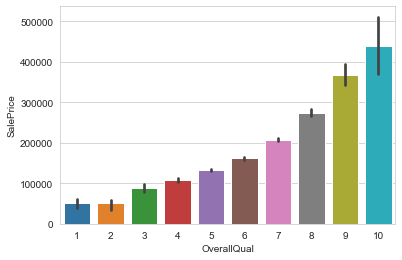

In [31]:
sns.barplot(data = train, x = 'OverallQual', y='SalePrice')

In [32]:
train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

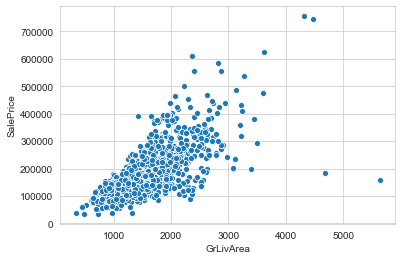

In [33]:
sns.scatterplot(data = train , x='GrLivArea', y='SalePrice')

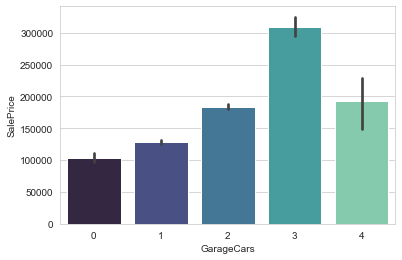

In [34]:
sns.barplot(data = train , x='GarageCars', y='SalePrice', palette='mako')

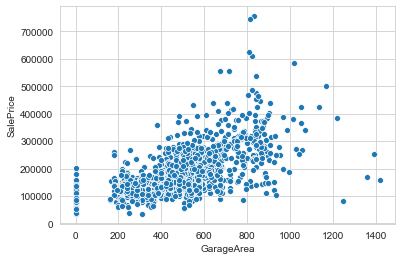

In [35]:
sns.scatterplot(data = train , x='GarageArea', y='SalePrice', palette='mako')

# Correlation

In [36]:
#check the correlation efter I've transformed the categorical variables
corr=dataset_cat.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:20], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-20:])

SalePrice           1.000000
OverallQual         0.548617
GrLivArea           0.520311
GarageCars          0.444406
GarageArea          0.437654
TotalBsmtSF         0.431912
1stFlrSF            0.422097
FullBath            0.394977
TotRmsAbvGrd        0.390869
BsmtQual_Ex         0.379926
YearBuilt           0.368664
YearRemodAdd        0.354302
KitchenQual_Ex      0.352403
MasVnrArea          0.339679
Fireplaces          0.329421
GarageYrBlt         0.321398
ExterQual_Gd        0.319726
ExterQual_Ex        0.314687
HeatingQC_Ex        0.307367
GarageFinish_Fin    0.294661
Name: SalePrice, dtype: float64 

BsmtCond_Fa        -0.087532
ExterCond_Fa       -0.089328
GarageCond_Fa      -0.090001
Electrical_FuseF   -0.092968
HeatingQC_Gd       -0.095910
HeatingQC_Fa       -0.097513
KitchenAbvGr       -0.098734
KitchenQual_Fa     -0.117172
Electrical_FuseA   -0.137165
PavedDrive_N       -0.138164
CentralAir_N       -0.175169
LotShape_Reg       -0.189670
MSZoning_RM        -0.199279
HeatingQC

In [37]:
#create function to decide which features that are correlated which eachother.
def correlation(dataset, threshold):
    
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr           

In [38]:
corr_features = correlation(dataset_cat, 0.8)
len(set(corr_features))
corr_features

{'1stFlrSF',
 'BldgType_1Fam',
 'CentralAir_Y',
 'Electrical_SBrkr',
 'ExterCond_TA',
 'ExterQual_TA',
 'GarageArea',
 'GarageCond_TA',
 'GarageQual_TA',
 'KitchenQual_TA',
 'LandSlope_Mod',
 'LotShape_Reg',
 'MSZoning_RM',
 'MasVnrType_None',
 'PavedDrive_Y',
 'Street_Pave',
 'TotRmsAbvGrd',
 'Utilities_NoSeWa'}

<b>I choose to remove the features that are correlated to another feature</b>

In [39]:
dataset_cat.drop(labels=corr_features, axis=1, inplace=True)

In [265]:
dataset_cat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,PavedDrive_N,PavedDrive_P
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,0,0,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,0,0,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
corr=dataset_cat.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:20], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice           1.000000
OverallQual         0.548617
GrLivArea           0.520311
GarageCars          0.444406
TotalBsmtSF         0.431912
FullBath            0.394977
BsmtQual_Ex         0.379926
YearBuilt           0.368664
YearRemodAdd        0.354302
KitchenQual_Ex      0.352403
MasVnrArea          0.339679
Fireplaces          0.329421
GarageYrBlt         0.321398
ExterQual_Gd        0.319726
ExterQual_Ex        0.314687
HeatingQC_Ex        0.307367
GarageFinish_Fin    0.294661
BsmtFinSF1          0.273579
LotFrontage         0.244680
MasVnrType_Stone    0.236637
Name: SalePrice, dtype: float64 

HeatingQC_Fa       -0.097513
KitchenAbvGr       -0.098734
KitchenQual_Fa     -0.117172
Electrical_FuseA   -0.137165
PavedDrive_N       -0.138164
CentralAir_N       -0.175169
HeatingQC_TA       -0.221036
BsmtExposure_No    -0.226605
BsmtQual_TA        -0.352699
GarageFinish_Unf   -0.363212
Name: SalePrice, dtype: float64


<b> Split up the data to train and test data </b>

In [41]:
dataset_cat.shape

(2919, 107)

In [269]:
train_len = len(train)
train_data = dataset_cat[:train_len]
test_data = dataset_cat[train_len:]

In [270]:
train_data.shape, test_data.shape

((1460, 107), (1459, 107))

# Model

In [271]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


<b> Setup the data for the model </b>

In [273]:
X = train_data.drop(['SalePrice', 'Id'], axis=1)
y= train_data['SalePrice']

In [274]:
X.shape, y.shape

((1460, 105), (1460,))

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [276]:
X_train.shape

(1314, 105)

In [277]:
#check how many features that have constant values
constants = VarianceThreshold(threshold=0)
constants.fit(X_train)
sum(constants.get_support())

104

In [278]:
#check which features that are constant and will be dropped
[x for x in X_train.columns if x not in X_train.columns[constants.get_support()]]

['HeatingQC_Po']

In [279]:
#remove the features that have constant values
X_train = constants.transform(X_train)
X_test = constants.transform(X_test)

In [280]:
X_train.shape, X_test.shape

((1314, 104), (146, 104))

In [281]:
#check how many features that have constant values
quasi_constants = VarianceThreshold(threshold=0.01)
quasi_constants.fit(X_train)

sum(quasi_constants.get_support())

86

In [282]:
X_train = quasi_constants.transform(X_train)
X_test = quasi_constants.transform(X_test)

In [283]:
X_train.shape, X_test.shape

((1314, 86), (146, 86))

In [237]:
print(type(y_train))
print(type(X_train))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [238]:
#transform my y_train so I can use it for scaling
y_train = y_train.to_numpy()

In [284]:
scaler_x = RobustScaler()
scale_X_train = scaler_x.fit_transform(X_train)
scale_X_test = scaler_x.transform(X_test)

In [240]:
scaler_y = RobustScaler()
scale_y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

In [285]:
scale_X_train.shape, y_train.shape

((1314, 86), (1314,))

<b>Create model</b>

In [78]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor = DecisionTreeRegressor(criterion = 'mse', max_depth = 5, splitter = 'best')
regressor.fit(X_train, y_train)

In [136]:
## Applying grid search  to find the best model and the best parameters
parameters = [{'splitter': ['best', 'random'],
               'criterion': ['mse', 'friedman_mse', 'mae'],
               'max_depth': [3,5,10,15,20]
                }]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters, cv=10)

grid_search = grid_search.fit(scale_X_train, scale_y_train)

#grid_searchsearch.scoring

#best_acc = grid_search.best_score_
best_para = grid_search.best_params_
#print(best_acc)
print(best_para)

{'criterion': 'mse', 'max_depth': 5, 'splitter': 'best'}


In [286]:
regressor = RandomForestRegressor(criterion = 'mse', max_depth = 5)
regressor.fit(scale_X_train, scale_y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [152]:
## Applying grid search  to find the best model and the best parameters
parameters = [{'n_estimators': [10,20,50,80,100,200,300,400, 500,600,800],
               'criterion': ['mae', 'mse'],
               'max_depth': [3,5,10,15,20]
                }]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters, cv=10)

grid_search = grid_search.fit(X_train, y_train)

#best_acc = grid_search.best_score_
best_para = grid_search.best_params_
#print(best_acc)
print(best_para)

KeyboardInterrupt: 

In [195]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [167]:
####SVC
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear'], 'gamma': [0.09, 0.08,0.07,0.06,0.05],
               'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.09, 0.08,0.07,0.06,0.05]
                }]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters, cv=10)

grid_search = grid_search.fit(X_train, y_train)

#best_acc = grid_search.best_score_
best_para = grid_search.best_params_
#print(best_acc)
print(best_para)

{'C': 1000, 'gamma': 0.05, 'kernel': 'rbf'}


In [287]:
y_pred = regressor.predict(scale_X_test)

In [289]:
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1))

In [290]:
y_pred

array([[264611.0032391 ],
       [145253.04636828],
       [142326.98599609],
       [366945.99861253],
       [392076.77161871],
       [120272.52508653],
       [144283.36127766],
       [173951.66265141],
       [156117.62105554],
       [134307.20629777],
       [117992.644219  ],
       [152705.55843222],
       [138953.50619424],
       [185686.66302773],
       [142521.78422316],
       [149812.51445733],
       [144237.21518628],
       [123368.20907008],
       [158580.14839137],
       [230839.82107636],
       [140676.02956299],
       [ 95098.6630776 ],
       [182457.49985911],
       [160323.38643937],
       [212574.15285514],
       [140363.21777065],
       [109490.71085627],
       [173216.55036743],
       [190155.76901093],
       [129780.26645854],
       [193955.11537635],
       [156337.91998573],
       [177212.01962831],
       [283247.49977867],
       [ 81554.91544421],
       [100441.0607062 ],
       [404478.57283338],
       [210979.19657688],
       [1179

<b>Inverse all variables so I can check the accuracy </b>

In [107]:
scale_y_train = scaler_y.inverse_transform(scale_y_train.reshape(-1,1))

In [108]:
scale_X_train = scaler_x.inverse_transform(scale_X_train)

In [109]:
scale_X_test = scaler_x.inverse_transform(scale_X_test)

In [292]:
#check accuracy with Cross val score
accuracies = cross_val_score(estimator = regressor, X = scale_X_train, y = y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8219777569917047
0.05694356459804461


In [178]:
# Check acc for the test data
print ("R^2 is: \n", regressor.score(X_test, y_test))

R^2 is: 
 -0.03568178614217987


In [306]:
print ('RMSE is: \n', mean_squared_error(y_test, y_pred))

RMSE is: 
 785068230.6296346


In [305]:
mean_absolute_error(y_test, y_pred)

19337.129223224274

In [293]:
r2_score(y_test, y_pred)

0.8452677467895708

# Submission 

In [294]:
Id = test_data['Id']
test_data = test_data.drop(['SalePrice', 'Id'], axis=1)

In [258]:
test_data.shape

(1459, 105)

In [301]:
X_valid = constants.transform(test_data)

In [302]:
X_valid = quasi_constants.transform(X_valid)

In [297]:
X_valid.shape

(1459, 86)

In [298]:
X_valid = scaler_x.transform(X_valid)

In [303]:
prediction = regressor.predict(X_valid)

In [304]:
output = pd.DataFrame({'Id': Id, 'SalePrice': prediction})
output.to_csv('my_submission.csv', index=False)